In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df= pd.read_csv("marketing_campaign.csv")
df.head()




,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.shape[0]#for rows only

2240

In [9]:
df.shape[1]#for columns

29

In [10]:
df.isnull().sum() # finding  missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# Drop rows where Income is missing
df = df.dropna(subset=['Income'])




In [12]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Feature Engineering

In [38]:
# Age
df['Age'] = 2026 - df['Year_Birth']

# Total spending
spend_cols = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]
df['TotalSpend'] = df[spend_cols].sum(axis=1)

# Total children
df['Children'] = df['Kidhome'] + df['Teenhome']


Distribution of Numerical Features

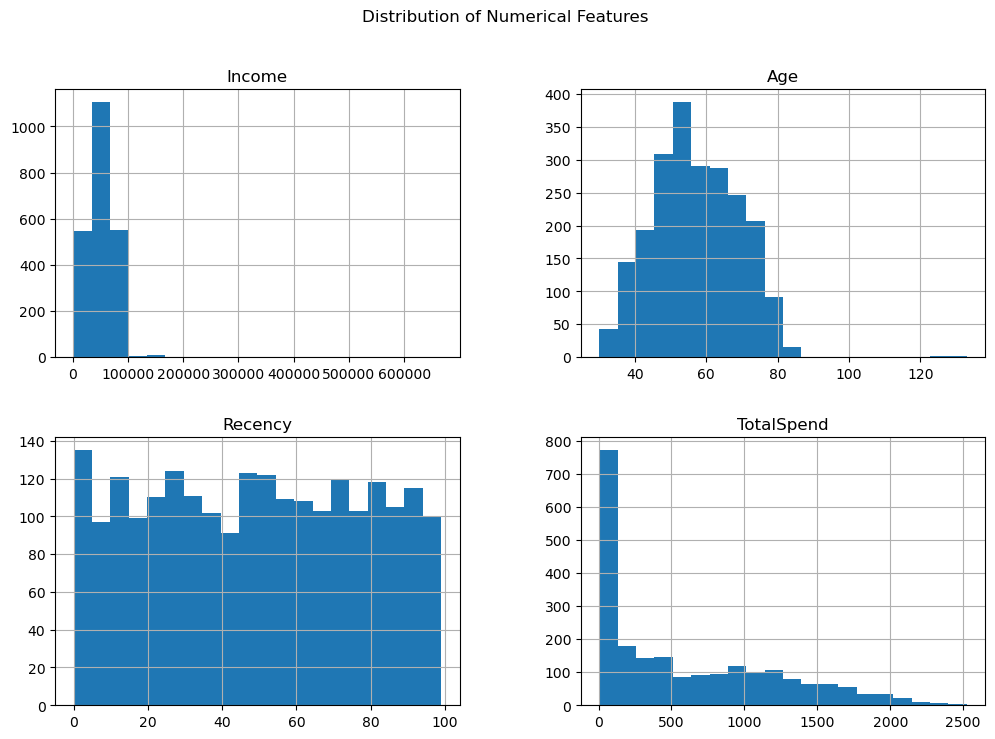

In [14]:
df[['Income','Age','Recency','TotalSpend']].hist(
    figsize=(12,8),
    bins=20
)
plt.suptitle("Distribution of Numerical Features")
plt.show()


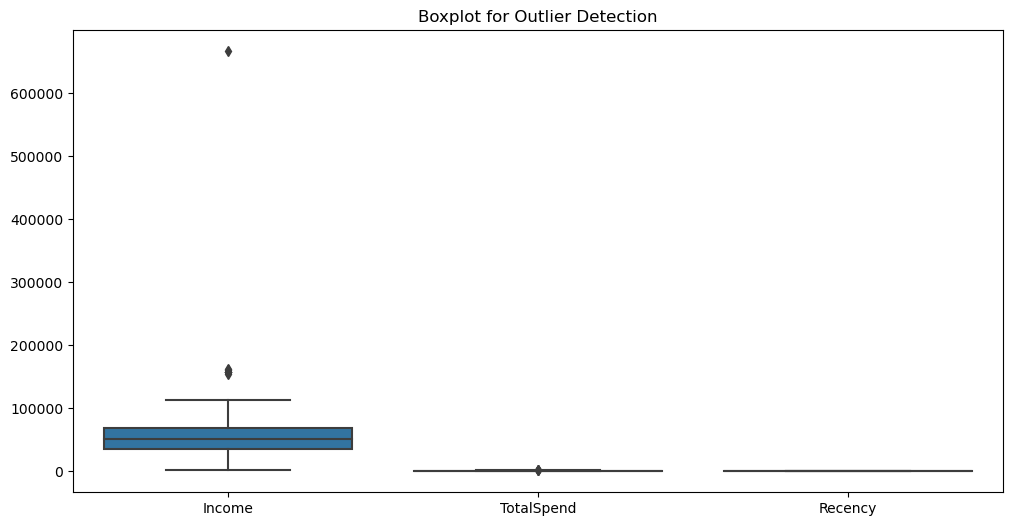

In [15]:
#Boxplot (Outliers)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Income','TotalSpend','Recency']])
plt.title("Boxplot for Outlier Detection")
plt.show()   


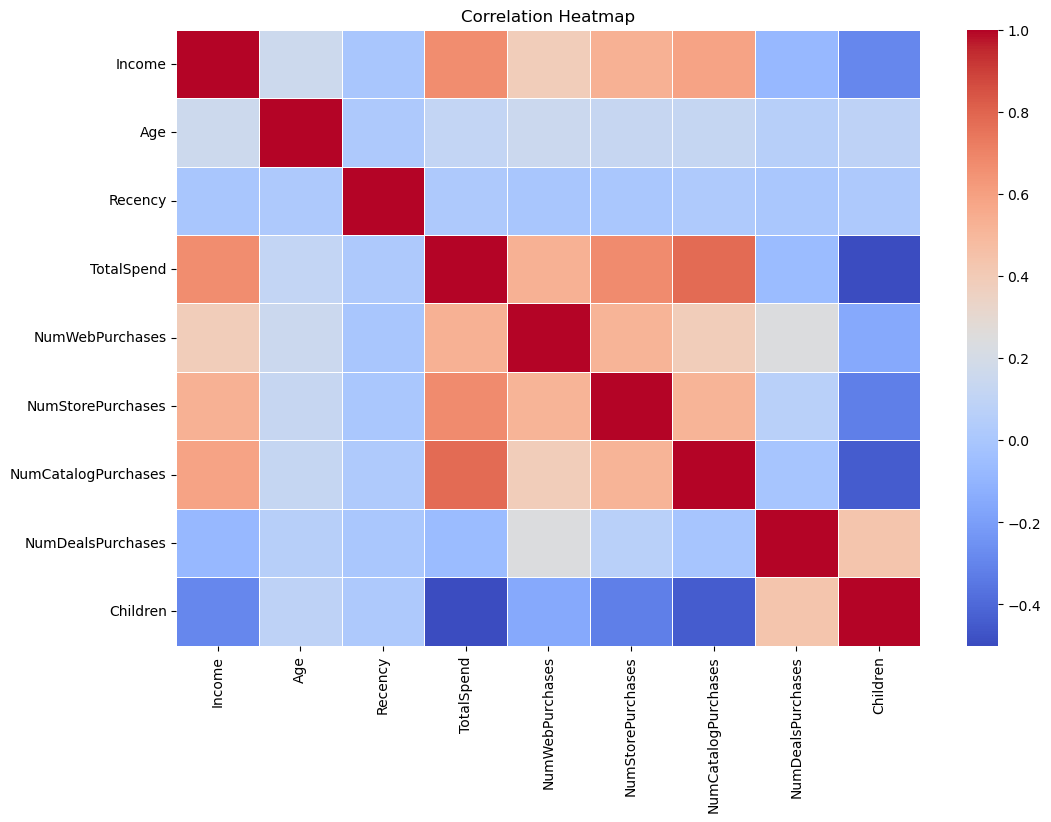

In [16]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    df[['Income','Age','Recency','TotalSpend',
        'NumWebPurchases','NumStorePurchases',
        'NumCatalogPurchases','NumDealsPurchases',
        'Children']].corr(),
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
#Feature Selection for Clustering
features = [
    'Income','Age','Recency','TotalSpend',
    'NumWebPurchases','NumStorePurchases',
    'NumCatalogPurchases','NumDealsPurchases',
    'Children'
]

X = df[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


MODEL 1: KMEANS CLUSTERING KMeans Model

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)


In [31]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(
    X_scaled, df['Cluster_KMeans']
)

print("KMeans Silhouette Score:", kmeans_silhouette)

#Measures cluster separation and compactness.

KMeans Silhouette Score: 0.24083519389983282


MODEL 2: HIERARCHICAL CLUSTERING Agglomerative Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4)
df['Cluster_Hierarchical'] = hierarchical.fit_predict(X_scaled)



In [32]:
hier_silhouette = silhouette_score(
    X_scaled, df['Cluster_Hierarchical']
)

print("Hierarchical Silhouette Score:", hier_silhouette)



Hierarchical Silhouette Score: 0.2181886374982115


MODEL COMPARISON (compare both models)

In [33]:
comparison = pd.DataFrame({
    'Model': ['KMeans', 'Hierarchical'],
    'Silhouette Score': [kmeans_silhouette, hier_silhouette]
})

comparison


,Model,Silhouette Score
0,KMeans,0.240835
1,Hierarchical,0.218189


In [34]:
# Select KMeans as final model (if silhouette is higher)
df['Final_Cluster'] = df['Cluster_KMeans']


In [37]:
# After KMeans
kmeans_silhouette = silhouette_score(X_scaled, df['Cluster_KMeans'])

# After Hierarchical
hier_silhouette = silhouette_score(X_scaled, df['Cluster_Hierarchical'])


In [35]:
final_profile = df.groupby('Final_Cluster')[features].mean()
final_profile


,Income,Age,Recency,TotalSpend,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,Children
Final_Cluster,,,,,,,,,
0,34697.826220,54.448171,49.385163,90.321138,2.004065,3.155488,0.522358,1.857724,1.211382
1,61504.484436,62.492218,46.252918,819.939689,6.573930,8.307393,3.319066,2.601167,0.951362
2,78332.109562,56.770916,50.950199,1433.302789,4.866534,8.318725,6.338645,1.125498,0.117530
3,49542.703704,57.930556,49.379630,534.425926,5.828704,6.037037,2.393519,6.569444,1.662037


conclusion

-The customer data was cleaned and prepared, and important features were created for analysis.

-Basic exploratory analysis was performed using distribution plots, boxplots, and a correlation heatmap.

-Two clustering models, K-Means and Agglomerative clustering, were applied to the data.

-Both models were evaluated using the silhouette score for fair comparison.

-The better-performing model was selected to create meaningful customer segments for business use.